In [211]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.optimize import curve_fit

In [212]:
def extractData(filename):
    prefix = "ugastro\\Lab1Data\\Section5_2\\"
    raw_data = np.load(prefix + filename)
    windowed_data = windowData(removeBuffer(raw_data['time_data']))
    return normalize(windowed_data)

def removeBuffer(data):
    return data[2:3][0]

def windowData(data):
    return data[1000:1100]

def normalize(data):
    return (data - np.mean(data))

In [213]:
data_480_900 = extractData("lab_1_data_480khz_900khz.npz")
data_480_950 = extractData("lab_1_data_480khz_900khz.npz")
data_480_1000 = extractData("lab_1_data_480khz_1000khz.npz")
data_480_1300 = extractData("lab_1_data_480khz_1300khz.npz")
data_480_2000 = extractData("lab_1_data_480khz_2000khz.npz")
data_480_3000 = extractData("lab_1_data_480khz_3000khz.npz")
data_480_3100 = extractData("lab_1_data_480khz_1000khz.npz")

data_480_1000_offset = extractData("lab_1_data_480khz_1000khz_offset.npz")
data_480_1300_offset = extractData("lab_1_data_480khz_1300khz_offset.npz")
data_480_2000_offset = extractData("lab_1_data_480khz_2000khz_offset.npz")
data_480_3000_offset = extractData("lab_1_data_480khz_3000khz_offset.npz")
data_480_3100_offset = extractData("lab_1_data_480khz_1000khz_offset.npz")

times = windowData([i / 1e3 for i in range(0, 2048)])

In [214]:
def printDataBlocks(dataset):
    n = len(dataset)
    fig, axs = plt.subplots(1, n, figsize=(18, 6))

    for i in range(0, n):
        axs[i].plot(times, data_480_1000[i])
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")

    plt.tight_layout()
    plt.show()

In [215]:
def graphAllTimeData(datasets, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        axs[i].plot(times, data, label=labels[i], alpha=1)
        axs[i].scatter(times, data, alpha=1)
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")
        axs[i].set_title(f"{signal} Signal w/ {labels[i]} Sample Rate")

    plt.tight_layout()
    plt.show()

In [216]:
def graphOverlayTimeData(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        plt.plot(times, data, label=labels[i], alpha=1)
        plt.scatter(times, data, s=10)

    plt.xlabel("Time (ms)")
    plt.ylabel("Measured Voltage / Counts")
    plt.title(f"Analysis of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [217]:
def graphAllFourierTranforms(datasets, sample_rates, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2

        axs[i].plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{sample_rates[i]} kHz", alpha=1)

        print(f"Max Power for {sample_rates[i]}: {max(power_spectrum)}")
        
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Power Spectral Density (10^5)")
        axs[i].set_title(f"FT of {signal} Signal w/ {labels[i]}", size=10)
        axs[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def graphOverlayFourierTranforms(datasets, sample_rates, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2
        plt.plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{labels[i]}", alpha=1)

    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Amplitude")
    plt.title(f"Fourier Transform of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphOverlayFourierTranformsOneSided(datasets, sample_rates, labels, signal):
    plt.figure(figsize=(12,8))
    mid = len(times) // 2

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        plt.plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{labels[i]}", alpha=1)

    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Amplitude")
    plt.title(f"Fourier Transform of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

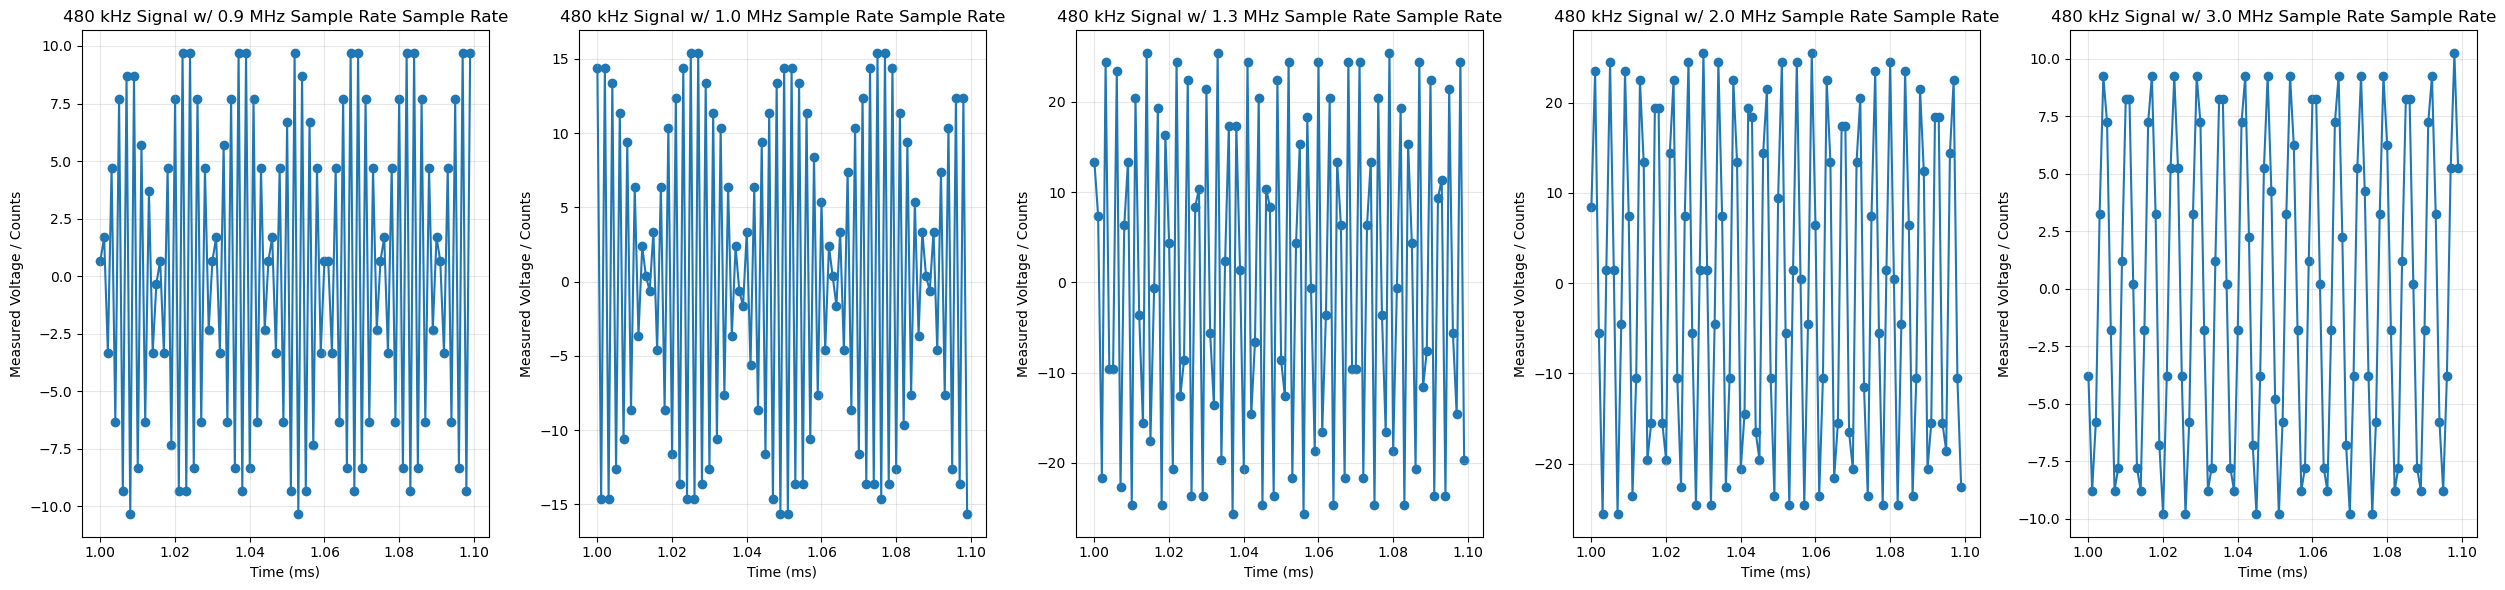

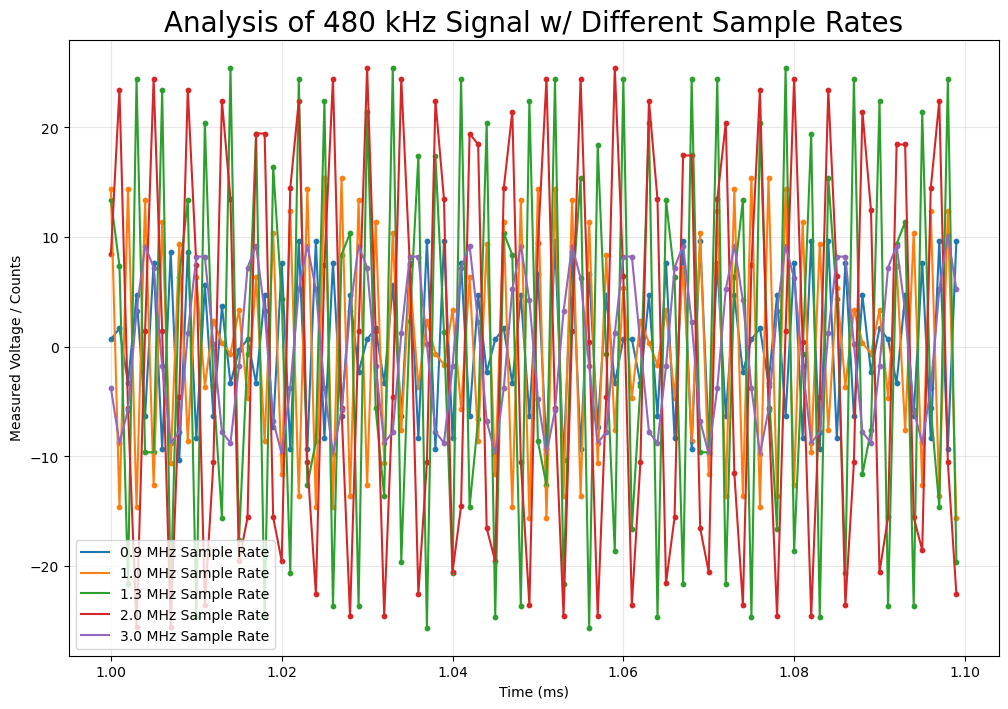

Max Power for 900000.0: 160897.43654703954
Max Power for 1000000.0: 558519.9189177688
Max Power for 1300000.0: 1549270.8321132462
Max Power for 2000000.0: 1559122.3414313945
Max Power for 3000000.0: 226020.38089998756


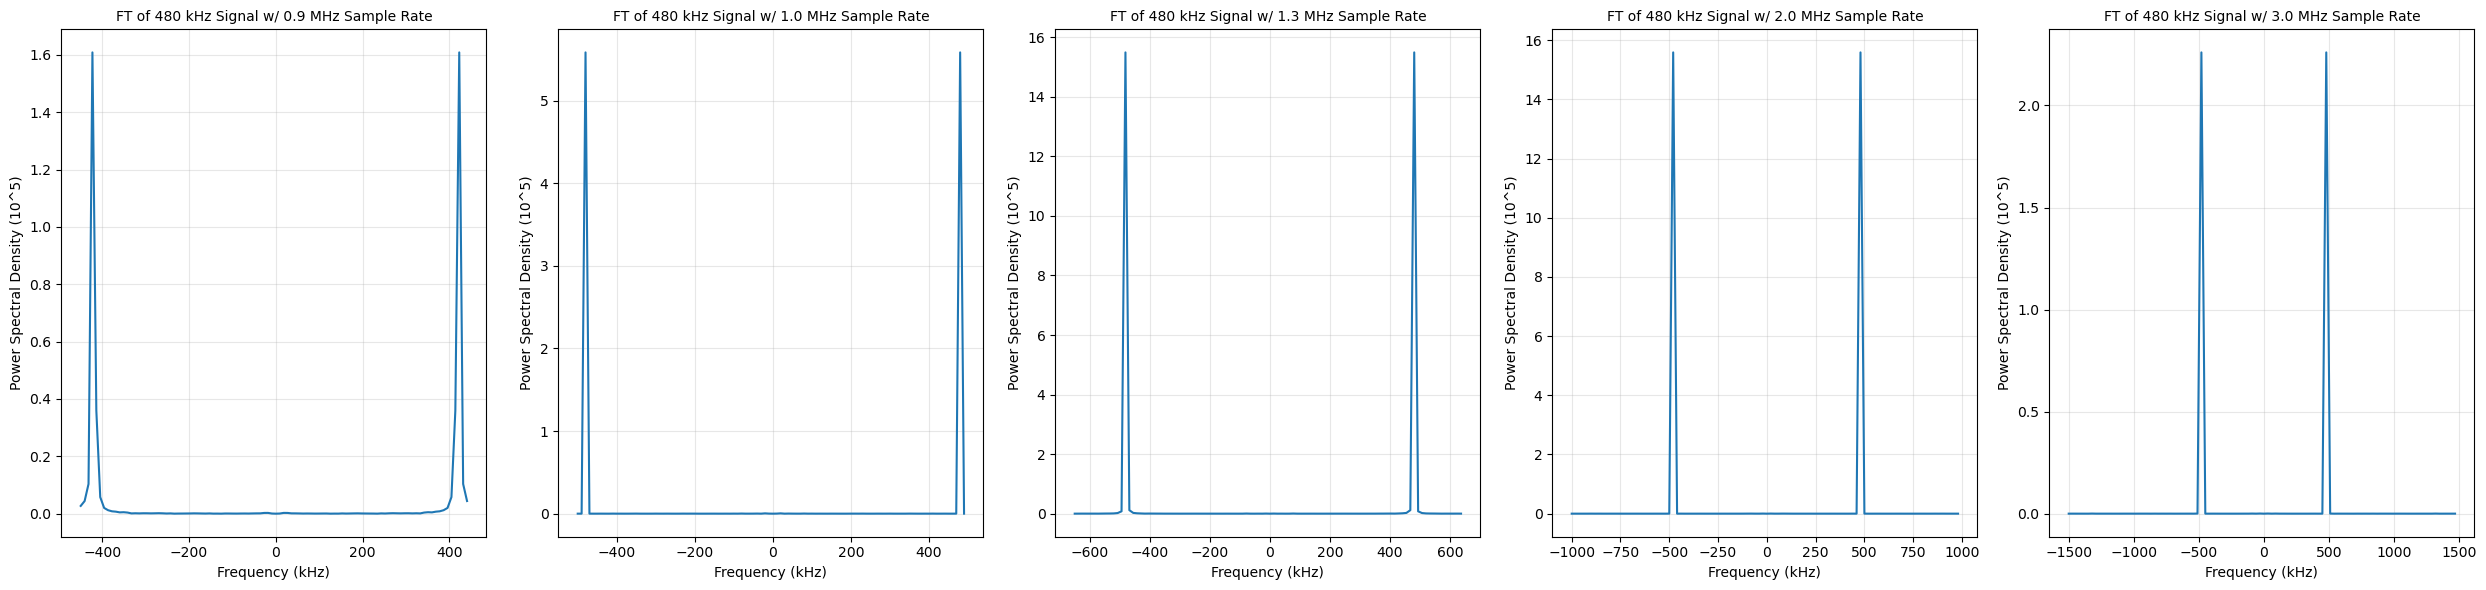

Max Power for 900000.0: 160897.43654703954
Max Power for 1000000.0: 558519.9189177688
Max Power for 1300000.0: 1549270.8321132462
Max Power for 2000000.0: 1559122.3414313945
Max Power for 3000000.0: 226020.38089998756


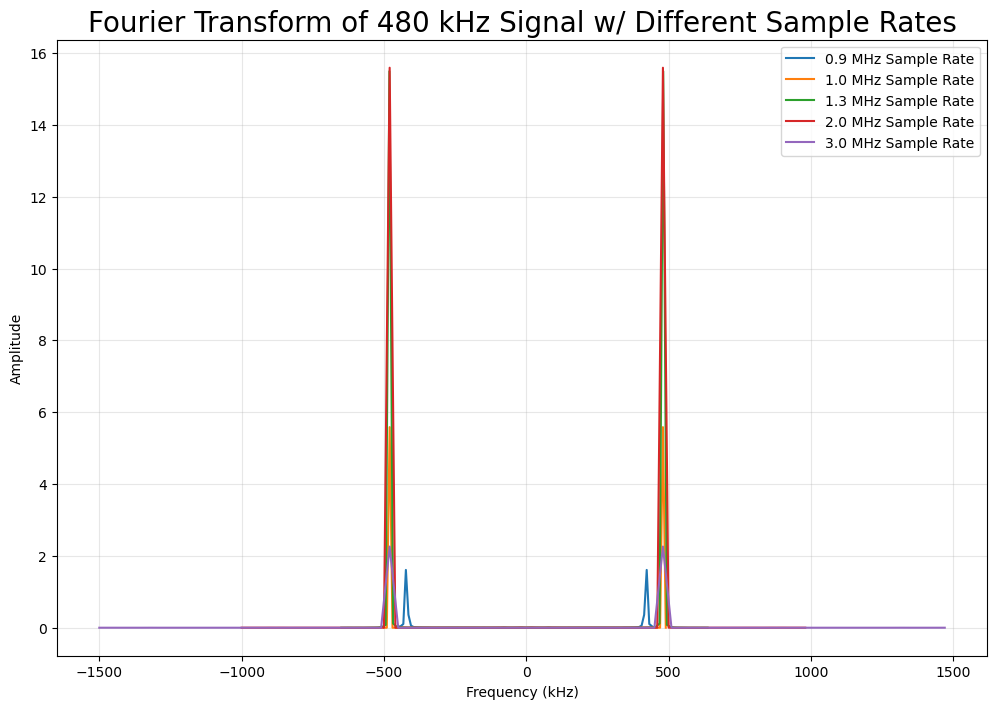

Max Power for 900000.0: 321794.8730940791
Max Power for 1000000.0: 1117039.8378355375
Max Power for 1300000.0: 3098541.6642264924
Max Power for 2000000.0: 3118244.682862789
Max Power for 3000000.0: 452040.7617999751


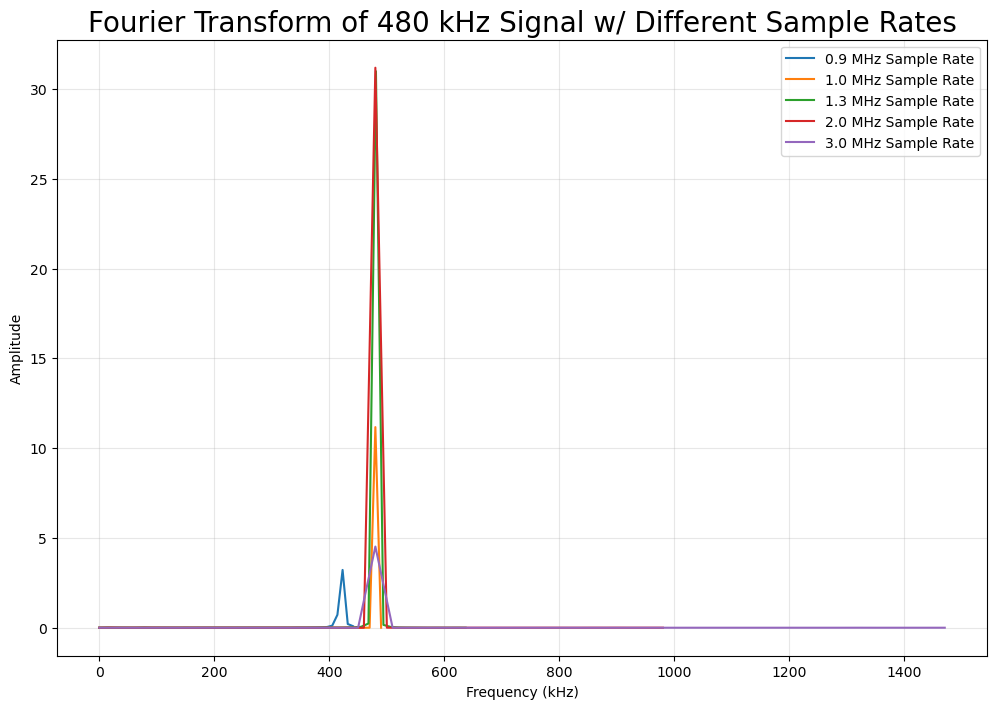

In [218]:
#datasets = [data_480_900, data_480_950, data_480_1000, data_480_1300, data_480_2000, data_480_3000, data_480_3100]
#labels = ["0.9 MHz Sample Rate", "0.95 MHz Sample Rate", "1.0 MHz Sample Rate", "1.3 MHz Sample Rate", "2.0 MHz Sample Rate", "3.0 MHz Sample Rate", "3.1 MHz Sample Rate"]
#signal = "480 kHz"

datasets = [data_480_900, data_480_1000, data_480_1300, data_480_2000, data_480_3000]#, data_480_3100]
sample_rates = [0.9e6, 1e6, 1.3e6, 2e6, 3e6, 3.1e6]
labels = ["0.9 MHz Sample Rate", "1.0 MHz Sample Rate", "1.3 MHz Sample Rate", "2.0 MHz Sample Rate", "3.0 MHz Sample Rate", "3.1 MHz Sample Rate"]
signal = "480 kHz"

graphAllTimeData(datasets, labels, signal)
graphOverlayTimeData(datasets, labels, signal)
graphAllFourierTranforms(datasets, sample_rates, labels, signal)
graphOverlayFourierTranforms(datasets, sample_rates, labels, signal)
graphOverlayFourierTranformsOneSided(datasets, sample_rates, labels, signal)